In [149]:
import numpy as np
from vpython import vector, mag, sphere, rate, color, canvas
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

%matplotlib notebook

colors = ['green', 'red', 'blue', 'darkorchid', 'tab:orange', 'cyan']

In [155]:
def distance(vec1, vec2):
    distance = np.sqrt(np.sum((vec1-vec2)**2))
    return distance

def force(posA, posB, mA, mB):
    F = -G * mA * mB / distance(posA, posB)**3 * (posA - posB)
    return F

def motion(t, r):
    num_particles = np.shape(r)[1]
    f = np.empty(np.shape(r))
    f[0] = r[1]
    for i in range(num_particles):
        f[1][i] = 0
        for j in range(num_particles):
            if i != j:
                f[1][i] += force(r[0][i], r[0][j], m[i], m[j]) / m[i]
    return f

def RungeKutta(r,tpoints,function):
    '''Fourth-order Runge-Kutta rewritten for two or more simultaneous equations
    Inputs: r: array of values, one for each equation in the system
            tpoints: array of time values.
            function: the function to use to solve the system
    Outputs: [xpoints, ypoints]: solutions for x(t) and y(t), numpy arrays of same length as tpoints'''
    
    ### When you reuse this function in your own work, remember:
    ### 1) add comments to indicate where you reused it from (and any other comments you want)
    ### 2) you DON'T need to change ANY of the code itself or rename any variables
    
    points = np.empty(np.shape(r))
    for t in tpoints:
        points = np.append(points, r, axis = 3)
        # The following is the same as in the previous session, 
        # but with x->r and calling the specified function
        k1 = h*function(t,r) 
        k2 = h*function(t+0.5*h, r+0.5*k1)
        k3 = h*function(t+0.5*h, r+0.5*k2)
        k4 = h*function(t+h, r+k3)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    return points

In [178]:
n = int(input('Number of particles: '))
dims = 3

positions  = []
velocities = []
for i in range(n):
    array_p = []
    array_v = []
    for j in range(dims):
        array_p.append([np.random.uniform(-10,10)])
        array_v.append([np.random.uniform(-1 ,1 )])
    positions.append(array_p)    
    velocities.append(array_v)
    
positions = np.array(positions)
velocities = np.array(velocities)

m_min = 1
m_max = 5

m = np.random.randint(m_min,m_max,size = n)

r = np.array([positions, velocities])

Number of particles: 20


In [179]:
## Time ##
tstart = 0.0                                       # startig time
tend = 50.0                                        # ending time
N = 100                                           # number of time points
h = (tend - tstart)/N                              # time step
tpoints = np.arange(tstart, tend, h)               # array of time points

G = 1

rsol = RungeKutta(r, tpoints, motion)

<IPython.core.display.Javascript object>


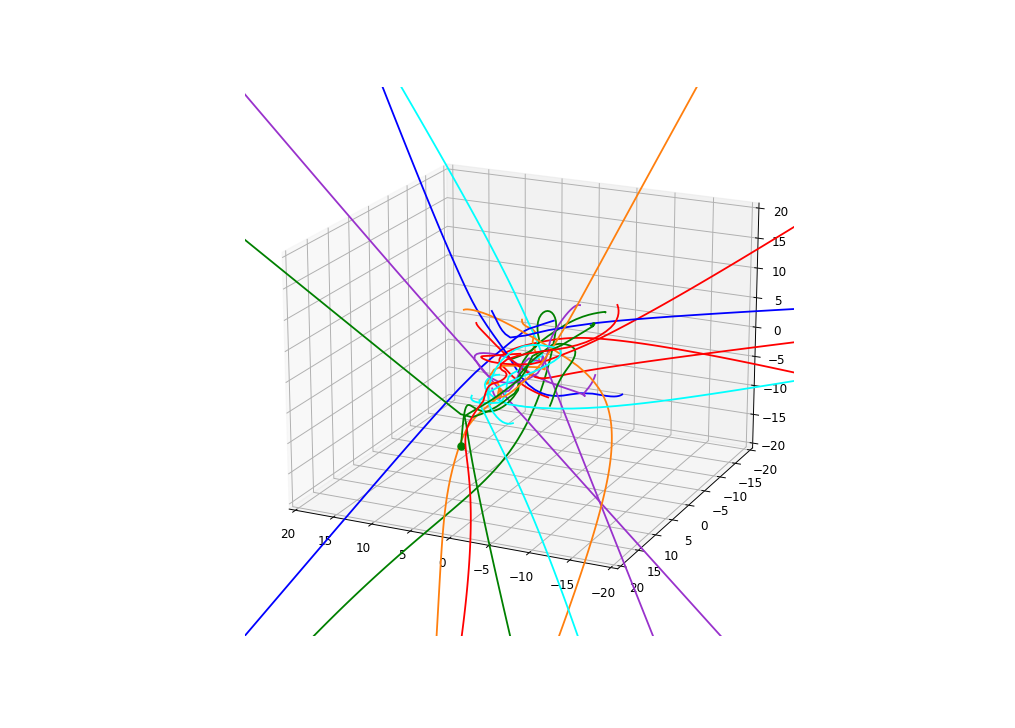

In [182]:
if dims <= 2 and dims > 0:
    plt.figure()
    for i in range(n):
        plt.plot(rsol[0][i][0][1:], rsol[0][i][1][1:], '-' ,color = colors[np.mod(i,len(colors))])
        plt.plot(rsol[0][i][0][-1], rsol[0][i][1][-1], 'o' ,color = colors[np.mod(i,len(colors))])
    plt.show()
    
elif dims == 3:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for i in range(n):
        plt.plot(rsol[0][i][0][1:], rsol[0][i][1][1:], rsol[0][i][2][1:] , '-' ,color = colors[np.mod(i,len(colors))])
        plt.plot(rsol[0][i][0][-1], rsol[0][i][1][-1], rsol[0][i][2][-1] , 'o' ,color = colors[np.mod(i,len(colors))])
        ax.set_xlim(-20, 20)
        ax.set_ylim(-20, 20)
        ax.set_zlim(-20, 20)

    
    plt.show()

<IPython.core.display.Javascript object>


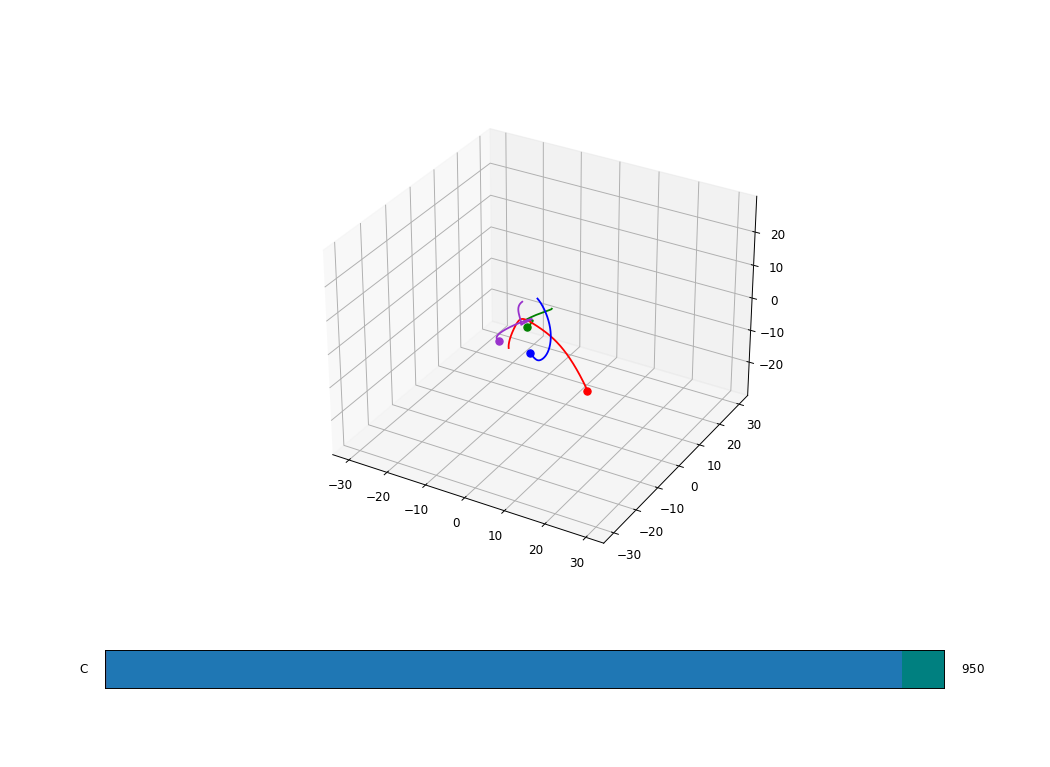

In [168]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-np.max(np.abs(rsol[0][:][0])), np.max(np.abs(rsol[0][:][0])))
ax.set_ylim(-np.max(np.abs(rsol[0][:][1])), np.max(np.abs(rsol[0][:][1])))
ax.set_zlim(-np.max(np.abs(rsol[0][:][2])), np.max(np.abs(rsol[0][:][2])))

ax_slider = plt.axes([0.1, 0.1, 0.8, 0.05], facecolor = 'teal')
plt.subplots_adjust(bottom = 0.25)

def update_line(val):
    ax.clear()
    for i in range(n):
        ax.plot(rsol[0][i][0][1:val], rsol[0][i][1][1:val], rsol[0][i][2][1:val] , '-' ,color = colors[np.mod(i,len(colors))])
        ax.plot(rsol[0][i][0][val], rsol[0][i][1][val], rsol[0][i][2][val] , 'o' ,color = colors[np.mod(i,len(colors))])
    ax.set_xlim(-np.max(np.abs(rsol[0][:][0])), np.max(np.abs(rsol[0][:][0])))
    ax.set_ylim(-np.max(np.abs(rsol[0][:][1])), np.max(np.abs(rsol[0][:][1])))
    ax.set_zlim(-np.max(np.abs(rsol[0][:][2])), np.max(np.abs(rsol[0][:][2])))
    plt.draw()

slider = Slider(ax_slider, 'C', valmin = 0, valmax = 1000, valinit = 0, valstep = 50)
slider.on_changed(update_line)

plt.show()